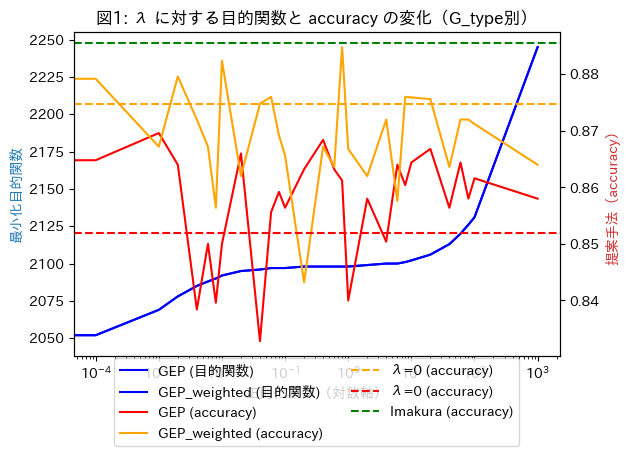

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("mnist_merge.csv")

# フォント設定
plt.rcParams["font.family"] = "IPAexGothic"

# λ列の整理とソート
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 色指定
color_map = {
    "GEP": "red",
    "GEP_weighted": "orange"
}

# 図の作成
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# G_typeごとに色分けして描画
for g_type, group in lambda_df.groupby("G_type"):
    color = color_map.get(g_type, "gray")
    ax1.plot(group["λ"], group["sum_objective_function"], label=f"{g_type} (目的関数)", color="blue", linestyle="-")
    ax2.plot(group["λ"], group["提案手法"], label=f"{g_type} (accuracy)", color=color)

# 横線の追加
ax2.axhline(y=0.8748, color="orange", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.852, color="red", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.8856, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化（G_type別）")

# 凡例統合
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.tight_layout()
plt.show()


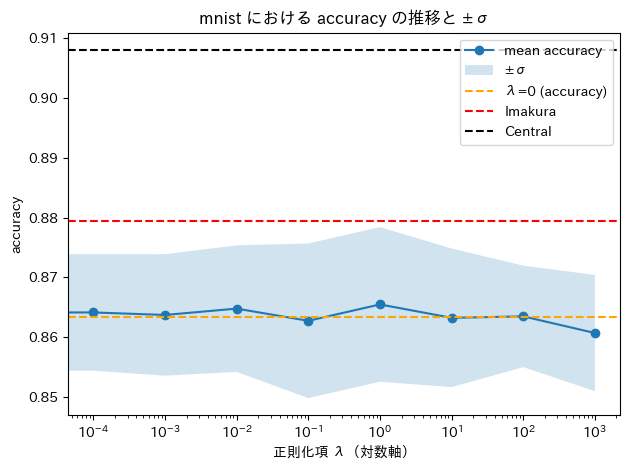

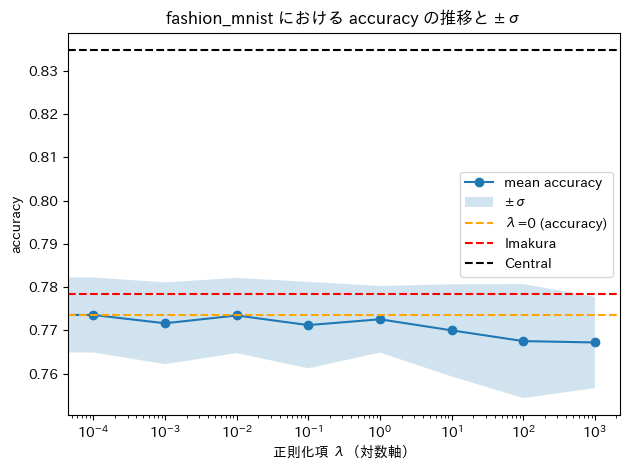

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# データ読み込み
df = pd.read_csv("result_mnist.csv")

# 必要な列があるか確認
columns_needed = ["dataset", "lambda", "metrics_mean", "metrics_stdev"]
assert all(col in df.columns for col in columns_needed), "必要な列が存在しません"

# データセットごとに描画
datasets = ["mnist", "fashion_mnist"]
figs = []

for dataset in datasets:
    df_subset = df[df["dataset"] == dataset].copy()
    df_subset = df_subset.sort_values("lambda")

    x = df_subset["lambda"]
    y = df_subset["metrics_mean"]
    err = df_subset["metrics_stdev"] 
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker="o", label="mean accuracy")
    ax.fill_between(x, y - err, y + err, alpha=0.2, label="±σ")
    ax.set_xscale("log")
    ax.set_xlabel("正則化項 λ（対数軸）")
    ax.set_ylabel("accuracy")
    ax.set_title(f"{dataset} における accuracy の推移と ±σ")
    if dataset == "mnist":
        ax.axhline(y=0.8634, color="orange", linestyle="--", label="λ=0 (accuracy)")
        ax.axhline(y=0.87948, color="red", linestyle="--", label="Imakura")
        ax.axhline(y=0.908, color="black", linestyle="--", label="Central")
    else:
        ax.axhline(y=0.77351, color="orange", linestyle="--", label="λ=0 (accuracy)")
        ax.axhline(y= 0.77848, color="red", linestyle="--", label="Imakura")
        ax.axhline(y= 0.83478, color="black", linestyle="--", label="Central")
    ax.legend()
    plt.tight_layout()
    figs.append(fig)

plt.show()


C:\Users\sueya\AppData\Local\Temp\ipykernel_24836\3977660707.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="upper left")


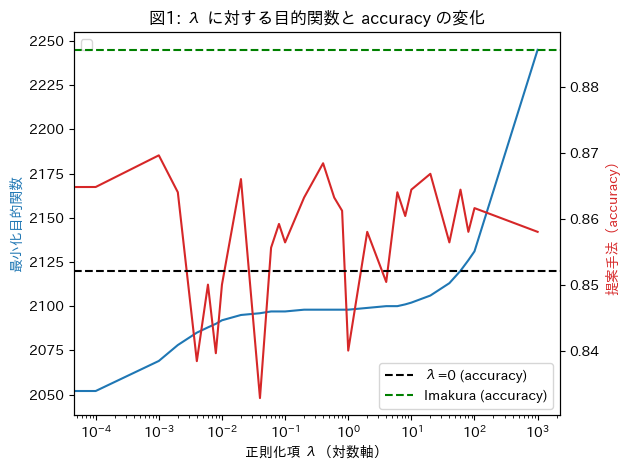

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_mnist_lambda.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.852, color="black", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.8856, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

# 凡例の追加
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

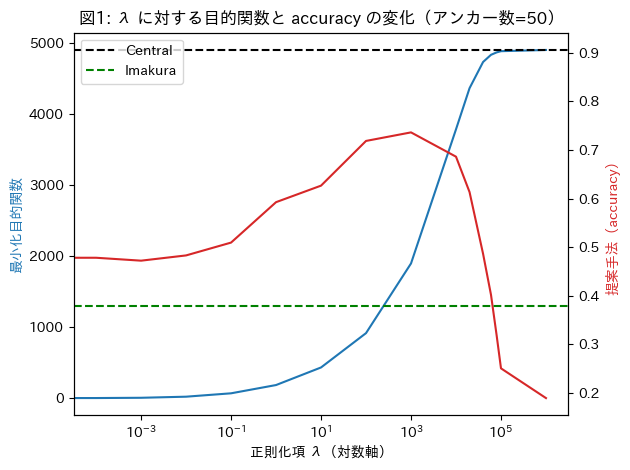

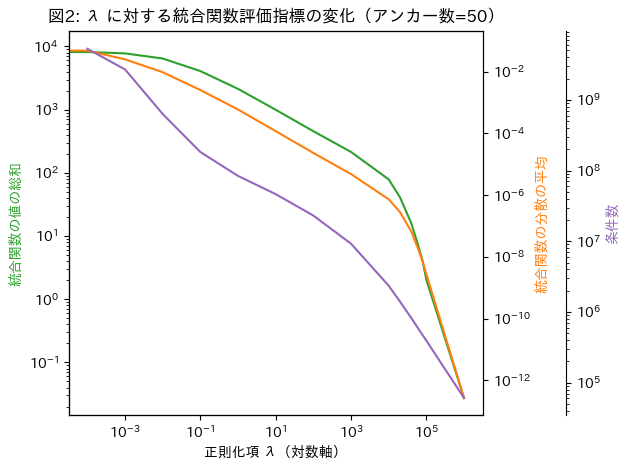

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_short_ancker_mnist.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.906, color="black", linestyle="--", label="Central")
ax2.axhline(y=0.3796, color="green", linestyle="--", label="Imakura")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化（アンカー数=50）")

# 凡例の追加
ax2.legend(loc="upper left")
#ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# 3軸目を右側にオフセット
ax3.spines["right"].set_position(("outward", 60))

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["g_abs_sum"], label="統合関数の値の総和", color="tab:green")
ax2.plot(lambda_df["λ"], lambda_df["g_mean_var"], label="統合関数の分散の平均", color="tab:orange")
ax3.plot(lambda_df["λ"], lambda_df["g_condition_number"], label="条件数", color="tab:purple")

# 軸の設定
ax1.set_xscale("log")
ax1.set_yscale("log")  # g_abs_sum を対数軸に
ax2.set_yscale("log")  # g_mean_var を対数軸に
ax3.set_yscale("log") 
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("統合関数の値の総和", color="tab:green")
ax2.set_ylabel("統合関数の分散の平均", color="tab:orange")
ax3.set_ylabel("条件数", color="tab:purple")
ax1.set_title("図2: λ に対する統合関数評価指標の変化（アンカー数=50）")

plt.tight_layout()
plt.show()


C:\Users\sueya\AppData\Local\Temp\ipykernel_24836\106027612.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="upper left")


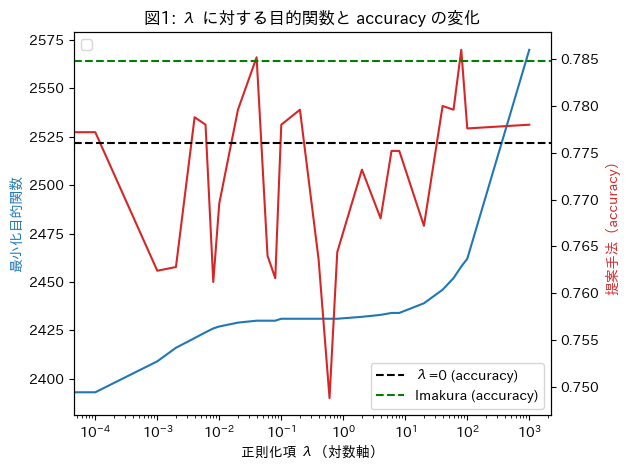

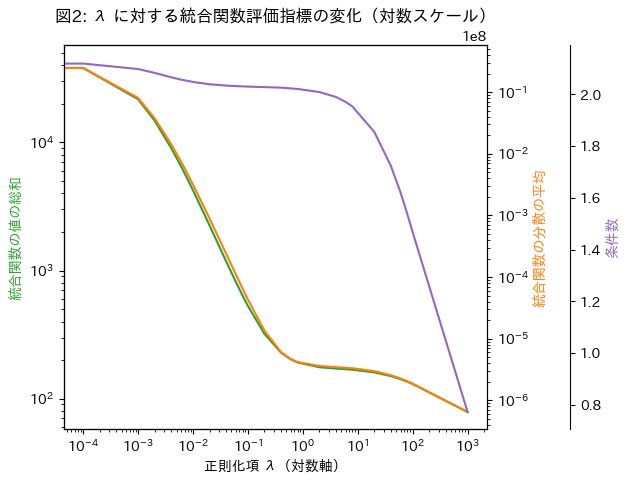

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

# データの読み込み
lambda_df = pd.read_csv("output_fashion_lambda.csv")

# 図の日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# lambdaの列名をわかりやすく
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})
lambda_df = lambda_df.sort_values("λ").reset_index(drop=True)

# 図1: sum_objective_function（左軸）と 提案手法（右軸）
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], color="tab:red")

# 横線の追加
ax2.axhline(y=0.776, color="black", linestyle="--", label="λ=0 (accuracy)")
ax2.axhline(y=0.7848, color="green", linestyle="--", label="Imakura (accuracy)")

# 軸の設定
ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

# 凡例の追加
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# 3軸目を右側にオフセット
ax3.spines["right"].set_position(("outward", 60))

# 各系列のプロット
ax1.plot(lambda_df["λ"], lambda_df["g_abs_sum"], label="統合関数の値の総和", color="tab:green")
ax2.plot(lambda_df["λ"], lambda_df["g_mean_var"], label="統合関数の分散の平均", color="tab:orange")
ax3.plot(lambda_df["λ"], lambda_df["g_condition_number"], label="条件数", color="tab:purple")

# 軸の設定
ax1.set_xscale("log")
ax1.set_yscale("log")  # g_abs_sum を対数軸に
ax2.set_yscale("log")  # g_mean_var を対数軸に
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("統合関数の値の総和", color="tab:green")
ax2.set_ylabel("統合関数の分散の平均", color="tab:orange")
ax3.set_ylabel("条件数", color="tab:purple")
ax1.set_title("図2: λ に対する統合関数評価指標の変化（対数スケール）")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [ ]:
# ライブラリの再インポート（セッションリセットにより必要）
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント対応
plt.rcParams["font.family"] = "IPAexGothic"

# アップロードファイルの再読み込み
file_path = "/mnt/data/output_mnist_lambda.csv"
lambda_df = pd.read_csv(file_path)

# 列名の変更
lambda_df = lambda_df.rename(columns={"lambda_gen_eigen": "λ"})

# 図1の描画
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(lambda_df["λ"], lambda_df["sum_objective_function"], label="最小化目的関数", color="tab:blue")
ax2.plot(lambda_df["λ"], lambda_df["提案手法"], label="提案手法 (accuracy)", color="tab:red")

ax1.set_xscale("log")
ax1.set_xlabel("正則化項 λ（対数軸）")
ax1.set_ylabel("最小化目的関数", color="tab:blue")
ax2.set_ylabel("提案手法（accuracy）", color="tab:red")
ax1.set_title("図1: λ に対する目的関数と accuracy の変化")

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Parameters
CSV_PATH = 'intermediate_representations.csv'
K_NEIGH = 7  # k for k‑NN distance that defines local scale σ_i

def self_tuning_gamma_stats(X: np.ndarray, k: int = 7):
    """
    Compute per‑sample σ_i (distance to k‑th nearest neighbour) and
    return median & mean γ = 1/σ over the samples.
    """
    # k+1 neighbours because the first neighbour is the point itself
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto', metric='euclidean')
    nbrs.fit(X)
    distances, _ = nbrs.kneighbors(X, return_distance=True)
    # distances[:, 0] is zero (self‑distance); take k‑th neighbour distance
    sigma_i = distances[:, k]
    sigma_i[sigma_i == 0] = np.finfo(float).eps  # avoid division by zero
    gamma_i = 1.0 / sigma_i
    return np.median(gamma_i), np.mean(gamma_i)

# 1. Load CSV
df = pd.read_csv(CSV_PATH)

# 2. Restrict to train data
train_df = df[df['data_type'] == 'train'].copy()

# 3. Identify feature columns (assumed to start with 'dim')
feature_cols = [c for c in train_df.columns if c.startswith('dim')]
if not feature_cols:
    raise ValueError("No feature columns starting with 'dim' were found.")

# 4. Standardise features (global standardisation)
scaler = StandardScaler()
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])

# 5. Compute self‑tuning γ for each institution
records = []
for inst, grp in train_df.groupby('institution'):
    X = grp[feature_cols].values
    gamma_median, gamma_mean = self_tuning_gamma_stats(X, k=K_NEIGH)
    records.append({
        'institution': inst,
        'gamma_median_self_tuning': gamma_median,
        'gamma_mean_self_tuning': gamma_mean,
        'n_train_samples': len(grp)
    })

result_df = pd.DataFrame(records).sort_values('institution')


In [4]:
result_df

,institution,gamma_median_self_tuning,gamma_mean_self_tuning,n_train_samples
0,0,11.372532,12.211268,1125
1,1,17.762393,20.573345,1125
2,2,81.384662,133.496708,1125


In [7]:
import pandas as pd
import numpy as np

# Load uploaded CSV
df = pd.read_csv('intermediate_representations.csv')

# Identify feature columns (assumed to start with 'dim_')
dim_cols = [c for c in df.columns if c.startswith('dim')]

def median_gamma(X):
    n = X.shape[0]
    if n < 2:
        return float('nan')
    # Compute pairwise squared distances; sample if large
    if n > 3000:
        sample_idx = np.random.choice(n, size=min(1000, n), replace=False)
        subX = X[sample_idx]
        dists = np.sum((subX[:, None, :] - subX[None, :, :]) ** 2, axis=-1)
        vals = dists[np.triu_indices_from(dists, k=1)]
    else:
        dists = np.sum((X[:, None, :] - X[None, :, :]) ** 2, axis=-1)
        vals = dists[np.triu_indices_from(dists, k=1)]
    med = np.median(vals)
    return np.inf if med == 0 else 1.0 / med

results = []
for inst, grp in df[df['data_type'] == 'train'].groupby('institution'):
    gamma = median_gamma(grp[dim_cols].values)
    results.append((inst, gamma, len(grp)))

res_df = pd.DataFrame(results, columns=['institution', 'gamma_median_heuristic', 'n_train_samples'])
res_df 
# Show results to the user

,institution,gamma_median_heuristic,n_train_samples
0,0,2.658496,1125
1,1,1.776116,1125
2,2,10.574407,1125


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
# Parameters
CSV_PATH = 'intermediate_representations.csv'
K_NEIGH = 7  # k for k‑NN distance that defines local scale σ_i

def self_tuning_gamma(X, k=7, standardize=True, summary='median'):
    """Return aggregated gamma (median or mean) and vectors if summary None."""
    X = np.asarray(X, dtype=float)
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dists, _ = nbrs.kneighbors(X, return_distance=True)
    sigma_i = dists[:, k]
    sigma_i[sigma_i == 0] = np.finfo(float).eps
    gamma_i = 1.0 / sigma_i
    if summary is None:
        return gamma_i, sigma_i
    if summary == 'median':
        return float(np.median(gamma_i))
    elif summary == 'mean':
        return float(np.mean(gamma_i))
    else:
        raise ValueError

# Load CSV
df = pd.read_csv(CSV_PATH)

# Restrict to train rows
train_df = df[df['data_type'] == 'train'].copy()

# Only dim_1 and dim_2
feature_cols = ['dim_1', 'dim_2']
for col in feature_cols:
    if col not in train_df.columns:
        raise ValueError(f"{col} not found in dataset.")

records = []
for inst, grp in train_df.groupby('institution'):
    X = grp[feature_cols].values
    gamma_median = self_tuning_gamma(X, k=K_NEIGH, summary='median')
    gamma_mean = self_tuning_gamma(X, k=K_NEIGH, summary='mean')
    records.append({
        'institution': inst,
        'k': K_NEIGH,
        'median_gamma': gamma_median,
        'mean_gamma': gamma_mean,
        'n_train_samples': len(grp)
    })

result_df = pd.DataFrame(records).sort_values('institution')
result_df

,institution,k,median_gamma,mean_gamma,n_train_samples
0,0,7,11.925875,12.853258,1125
1,1,7,19.723208,22.948250,1125
2,2,7,65.563084,106.879061,1125


In [35]:
import pandas as pd
from pathlib import Path

# 入出力ファイル（ノートブックと同じフォルダ想定）
in_path = Path("output.csv")
out_path = Path("result_0912.csv")

group_cols = ["dataset", "G_type", "gamma_ratio"]
value_cols = [
    "losses_even_ind", "losses_odd_ind", "losses_ind",
    "losses_mean", "losses_even", "losses_odd",
    "integ_metrics", "metrics",
]

# 読み込み
df = pd.read_csv(in_path)

# 必要列チェック
missing_keys = [c for c in group_cols if c not in df.columns]
if missing_keys:
    raise ValueError(f"グループキーが見つかりません: {missing_keys}")

# 型整形
df["gamma_ratio"] = pd.to_numeric(df["gamma_ratio"], errors="coerce")

existing_value_cols = [c for c in value_cols if c in df.columns]
if not existing_value_cols:
    raise ValueError("集計対象カラムが見つかりません。列名を確認してください。")

for c in existing_value_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")  # 非数はNaNに

# 集計（NaNは平均時に無視）
result = (
    df.groupby(group_cols, dropna=True)[existing_value_cols]
      .mean()
      .reset_index()
      .sort_values(group_cols)
)

# 出力
result.to_csv(out_path, index=False)
print(f"Saved: {out_path}  shape={result.shape}")

Saved: result_0912.csv  shape=(86, 11)


Line2D(losses_even)


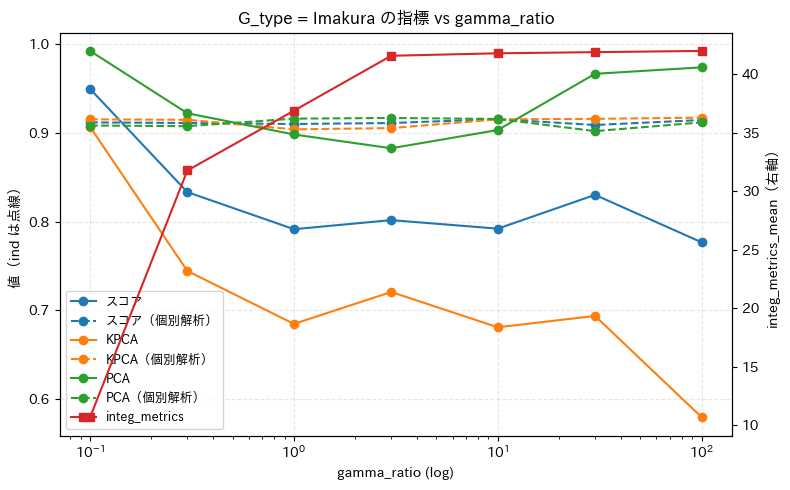

Line2D(losses_even)


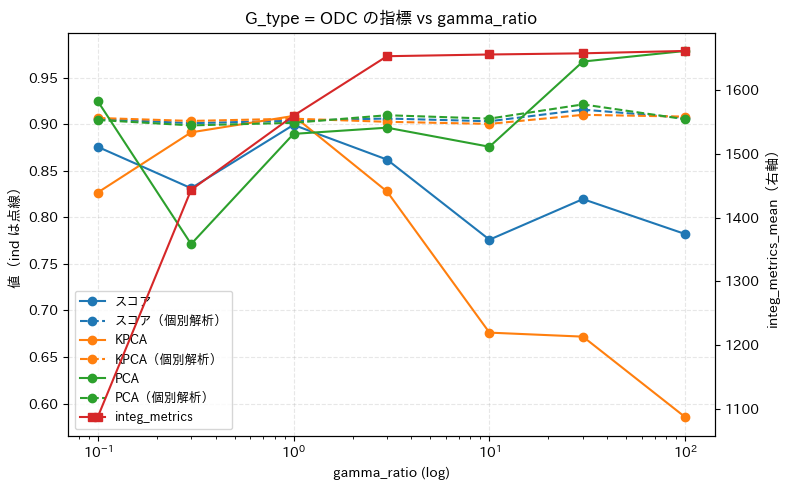

Line2D(losses_even)


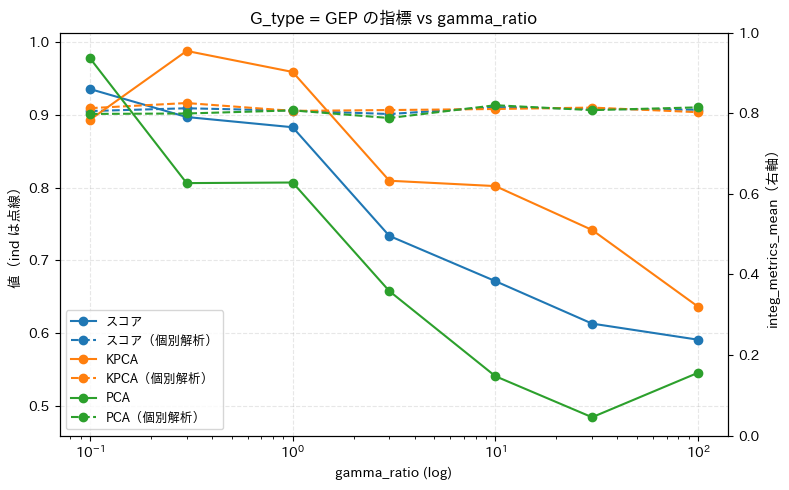

Line2D(losses_even)


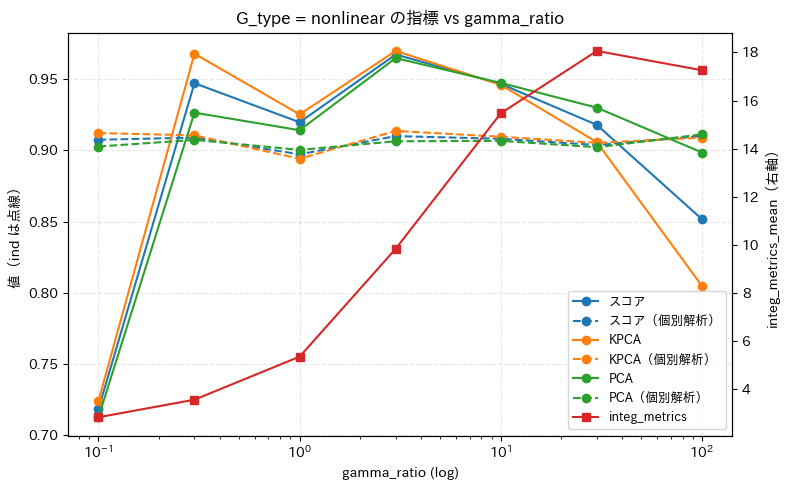

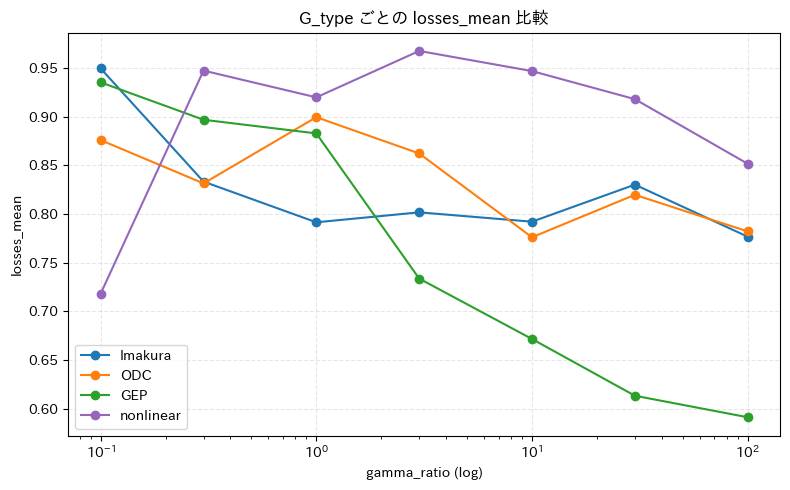

saved: c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_0912_metrics_mean_compare.png


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import japanize_matplotlib

# 入力CSVパス
csv_path = Path(r"c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\result_0912.csv")

# 出力先（CSVと同じフォルダに plots/ を作成）
outdir = csv_path.parent / "plots"
outdir.mkdir(parents=True, exist_ok=True)

# 読み込み
df = pd.read_csv(csv_path)

# 列整形
if "gamma_ratio" in df.columns:
    df["gamma_ratio"] = pd.to_numeric(df["gamma_ratio"], errors="coerce")
else:
    raise ValueError("gamma_ratio 列が見つかりません。")

df = df[df['dataset']=='concentric_three_circles']

# 対象 G_type
target_gtypes = ["Imakura", "ODC", "GEP", "nonlinear"]

# カラー割当（ind あり/なしで同色、ind は点線）
colors = {
    "losses_mean": "tab:blue",
    "losses_even": "tab:orange",
    "losses_odd": "tab:green",
    "losses_ind": "tab:purple",
    "integ_metrics": "tab:red",
}

# G_type ごとの図作成
for g in target_gtypes:
    sub = df[df["G_type"] == g].copy()
    if sub.empty:
        print(f"[warn] G_type={g} のデータがありません。スキップします。")
        continue
    sub = sub.sort_values("gamma_ratio")
    x = sub["gamma_ratio"].values

    fig, ax = plt.subplots(figsize=(8, 5))
    ax2 = ax.twinx()

    # 主軸（実数値系）
    plots = []
    labels = []

    def _plot_if_exists(column, color, ls="-", marker="o", axis=ax):
        if column in sub.columns and sub[column].notna().any():
            line, = axis.plot(x, sub[column].values, color=color, linestyle=ls, marker=marker, label=column)
            return line
        return None


    # mean 系
    h = _plot_if_exists("losses_mean", colors["losses_mean"], ls="-")
    if h: plots.append(h); labels.append("スコア")
    h = _plot_if_exists("losses_ind", colors["losses_mean"], ls="--")
    if h: plots.append(h); labels.append("スコア（個別解析）")

    # even 系
    h = _plot_if_exists("losses_even", colors["losses_even"], ls="-")
    print(h)
    if h: plots.append(h); labels.append("KPCA")
    h = _plot_if_exists("losses_even_ind", colors["losses_even"], ls="--")
    if h: plots.append(h); labels.append("KPCA（個別解析）")

    # odd 系
    h = _plot_if_exists("losses_odd", colors["losses_odd"], ls="-")
    if h: plots.append(h); labels.append("PCA")
    h = _plot_if_exists("losses_odd_ind", colors["losses_odd"], ls="--")
    if h: plots.append(h); labels.append("PCA（個別解析）")

    # 右軸：integ_metrics_mean（スケールが大きいので右軸に）
    if g != "GEP":
        h2 = _plot_if_exists("integ_metrics", colors["integ_metrics"], ls="-", marker="s", axis=ax2)
        if h2:
            plots.append(h2)
            labels.append("integ_metrics")

    # 軸設定
    ax.set_xscale("log")
    ax.set_xlabel("gamma_ratio (log)")
    ax.set_ylabel("値（ind は点線）")
    ax2.set_ylabel("integ_metrics_mean（右軸）")
    ax.grid(True, ls="--", alpha=0.3)

    # タイトル
    title = f"G_type = {g} の指標 vs gamma_ratio"
    ax.set_title(title)

    # 凡例（両軸まとめて）
    ax.legend(plots, labels, loc="best", fontsize=9)

    plt.tight_layout()
    # 保存
    save_path = outdir / f"{csv_path.stem}_by_Gtype_{g}.png"
    #plt.savefig(save_path, dpi=200)
    plt.show()
    #print(f"saved: {save_path}")

# 追加: G_type 間で metrics_mean を比較する図
fig, ax = plt.subplots(figsize=(8, 5))
for g, col in zip(
    target_gtypes,
    ["tab:blue", "tab:orange", "tab:green", "tab:purple"]
):
    sub = df[df["G_type"] == g].copy()
    if sub.empty or "losses_mean" not in sub.columns:
        continue
    sub = sub.sort_values("gamma_ratio")
    ax.plot(sub["gamma_ratio"].values, sub["losses_mean"].values, marker="o", linestyle="-", color=col, label=g)

ax.set_xscale("log")
ax.set_xlabel("gamma_ratio (log)")
ax.set_ylabel("losses_mean")
ax.grid(True, ls="--", alpha=0.3)
ax.set_title("G_type ごとの losses_mean 比較")
ax.legend(loc="best")

plt.tight_layout()
save_path = outdir / f"{csv_path.stem}_metrics_mean_compare.png"
plt.savefig(save_path, dpi=200)
plt.show()
print(f"saved: {save_path}")

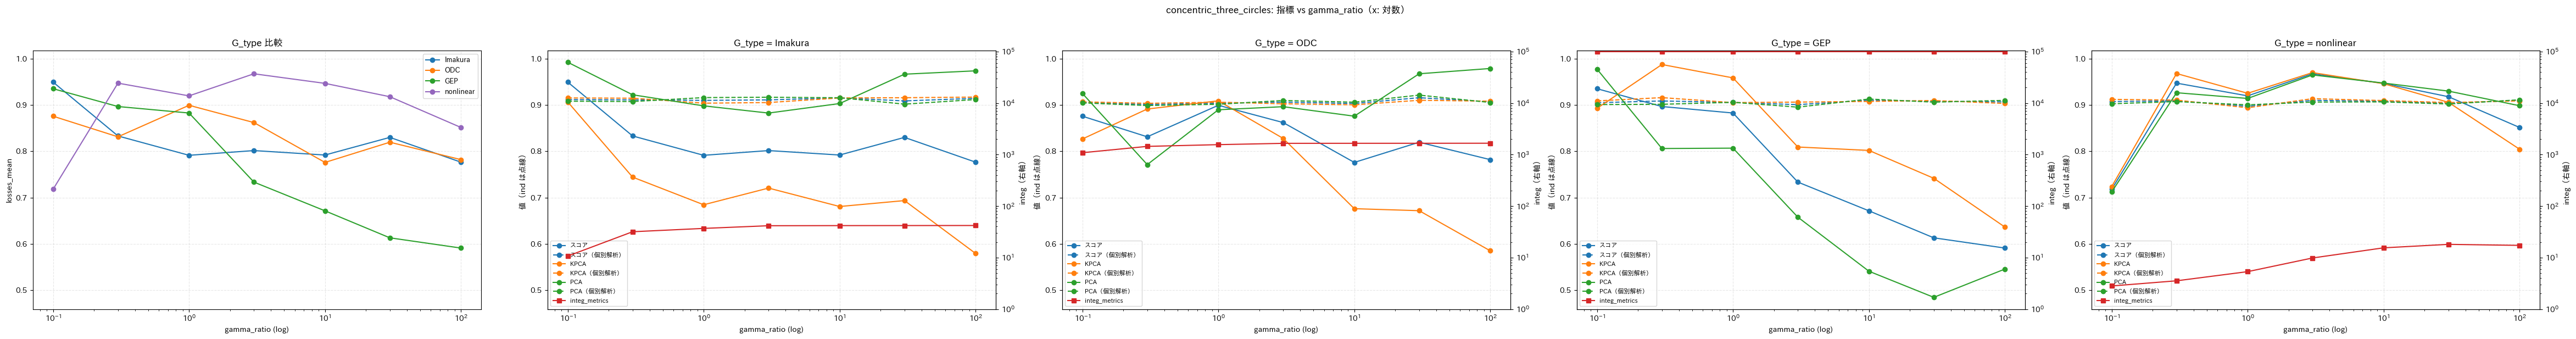

saved: c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_0912_concentric_three_circles_hstack.png


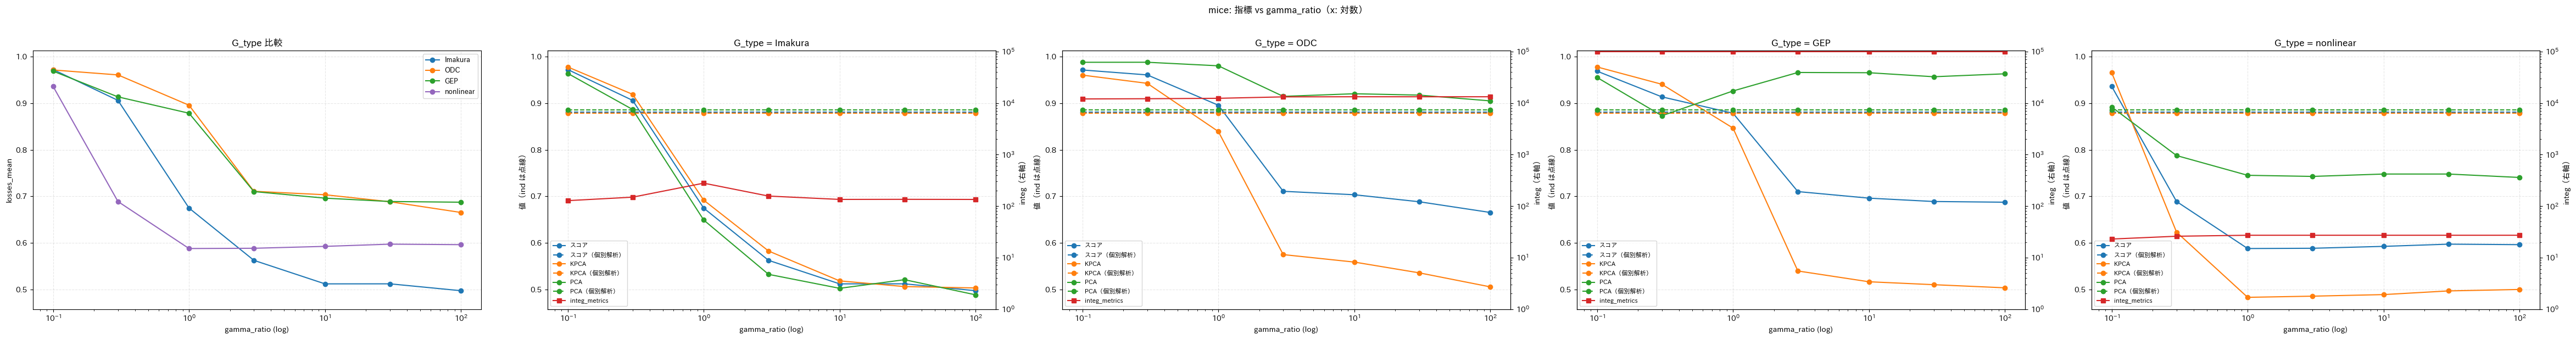

saved: c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_0912_mice_hstack.png


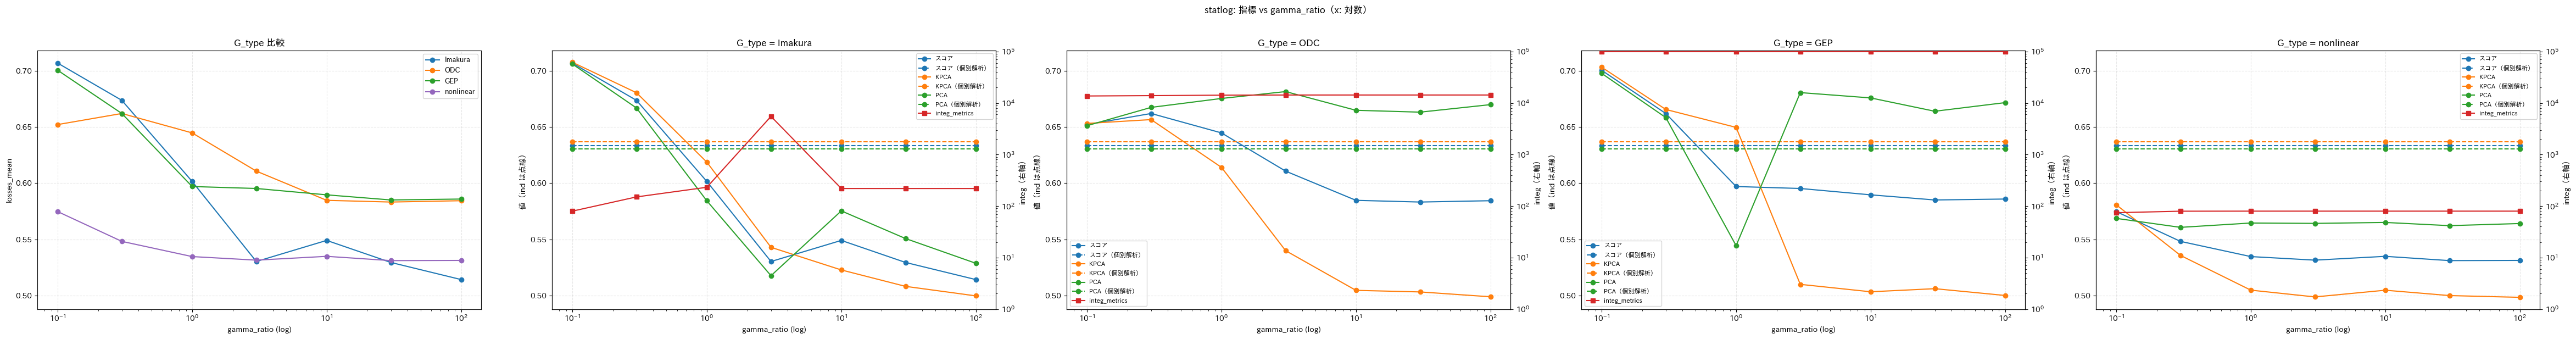

saved: c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_0912_statlog_hstack.png


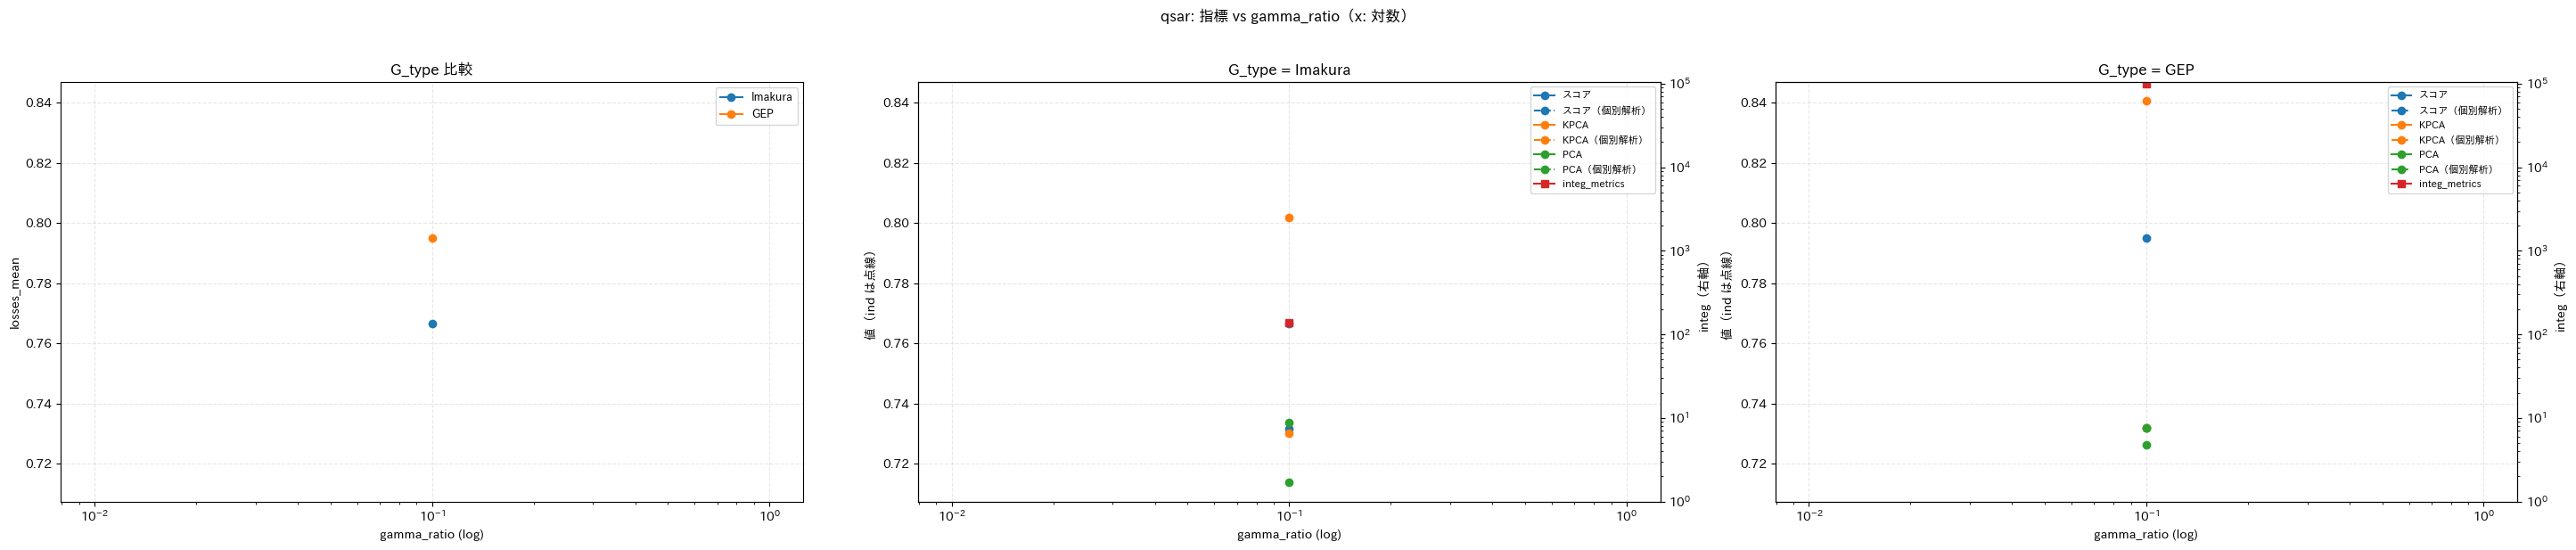

saved: c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_0912_qsar_hstack.png


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 入力CSV（集計済み: result_0912.csv）
csv_path = Path(r"c:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\result_0912.csv")

# 対象データセット（必要に応じて追加）
datasets = ["concentric_three_circles", "mice", "statlog", "qsar"]  # 例: ["concentric_three_circles", "mnist", "fashion_mnist"]

# 対象 G_type（この順で並べる）
target_gtypes = ["Imakura", "ODC", "GEP", "nonlinear"]

# 色・スタイル定義
palette = {
    "mean": "tab:blue",
    "even": "tab:orange",
    "odd": "tab:green",
    "metrics": "tab:purple",
    "integ": "tab:red",
}

# 表示したい系列の論理名 -> 実カラム候補（先に見つかった方を使用）
series_candidates = {
    # 左軸（実数値系）
    "mean_mean":        ["losses_mean"],
    "even_mean":        ["losses_even"],
    "odd_mean":         ["losses_odd"],
    "ind_mean":         ["losses_ind"],
    "even_ind_mean":    ["losses_even_ind"],
    "odd_ind_mean":     ["losses_odd_ind"],
    "metrics_mean":     ["metrics_mean", "metrics"],  # あれば metrics_mean、無ければ metrics
    # 右軸
    "integ_metrics_mean": ["integ_metrics_mean", "integ_metrics"],
}

# ラベル・スタイル（indは点線）
series_style = {
    "mean_mean":        {"label": "スコア",               "color": palette["mean"],    "ls": "-"},
    "ind_mean":         {"label": "スコア（個別解析）",   "color": palette["mean"],    "ls": "--"},
    "even_mean":        {"label": "KPCA",                "color": palette["even"],    "ls": "-"},
    "even_ind_mean":    {"label": "KPCA（個別解析）",     "color": palette["even"],    "ls": "--"},
    "odd_mean":         {"label": "PCA",                 "color": palette["odd"],     "ls": "-"},
    "odd_ind_mean":     {"label": "PCA（個別解析）",      "color": palette["odd"],     "ls": "--"},
    "metrics_mean":     {"label": "metrics",            "color": palette["metrics"], "ls": "-"},
    "integ_metrics_mean": {"label": "integ_metrics",    "color": palette["integ"],   "ls": "-"},
}

def pick_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# 読み込み
df = pd.read_csv(csv_path)

# 型整形
if "gamma_ratio" not in df.columns:
    raise ValueError("gamma_ratio 列が見つかりません。")
df["gamma_ratio"] = pd.to_numeric(df["gamma_ratio"], errors="coerce")

# 比較用（左端パネル）に使う列を選ぶ（優先順）
compare_candidates = ["losses_mean"]
compare_col = pick_column(df, compare_candidates)
if compare_col is None:
    raise ValueError("比較用の列（metrics_mean/metrics/losses_mean）が見つかりません。")

# 出力先
outdir = csv_path.parent / "plots"
outdir.mkdir(parents=True, exist_ok=True)

for dataset in datasets:
    dfd = df[(df["dataset"] == dataset) & df["gamma_ratio"].notna()].copy()
    if dfd.empty:
        print(f"[warn] dataset={dataset} のデータがありません。スキップします。")
        continue

    # 実際に存在する G_type の順序を決定
    gtypes_present = [g for g in target_gtypes if g in dfd["G_type"].unique()]
    if not gtypes_present:
        print(f"[warn] dataset={dataset}: target_gtypes のデータがありません。スキップします。")
        continue

    # 各論理系列 -> 実カラム名を確定（このデータセット内で存在する列のみ）
    resolved_cols = {}
    for key, cands in series_candidates.items():
        col = pick_column(dfd, cands)
        if col is not None:
            resolved_cols[key] = col
    # 左軸に使う系列のキー
    left_keys = [k for k in ["metrics_mean", "mean_mean", "ind_mean", "even_mean", "even_ind_mean", "odd_mean", "odd_ind_mean"]
                 if k in resolved_cols]
    # 右軸のキー
    right_keys = [k for k in ["integ_metrics_mean"] if k in resolved_cols]

    # y軸レンジ（左軸）をデータセット全体・全G_typeで揃える
    left_min, left_max = np.inf, -np.inf
    for g in gtypes_present:
        sub = dfd[dfd["G_type"] == g]
        for key in left_keys:
            vals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()
            vals = vals[np.isfinite(vals)]
            if vals.size:
                left_min = min(left_min, vals.min())
                left_max = max(left_max, vals.max())
    if not np.isfinite(left_min) or not np.isfinite(left_max):
        left_min, left_max = 0.0, 1.0
    if np.isclose(left_min, left_max):
        pad = 0.05 if left_max == 0 else 0.05 * abs(left_max)
        left_min, left_max = left_min - pad, left_max + pad
    else:
        span = left_max - left_min
        left_min -= 0.05 * span
        left_max += 0.05 * span

    # y軸レンジ（右軸：integ）をデータセット全体・全G_typeで揃える
    right_min, right_max = np.inf, -np.inf
    if right_keys:
        for g in gtypes_present:
            sub = dfd[dfd["G_type"] == g]
            for key in right_keys:
                vals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()
                vals = vals[np.isfinite(vals)]
                if vals.size:
                    right_min = min(right_min, vals.min())
                    right_max = max(right_max, vals.max())
        if not np.isfinite(right_min) or not np.isfinite(right_max):
            right_min, right_max = 0.0, 1.0
        if np.isclose(right_min, right_max):
            pad = 0.05 if right_max == 0 else 0.05 * abs(right_max)
            right_min, right_max = right_min - pad, right_max + pad
        else:
            span = right_max - right_min
            right_min -= 0.05 * span
            right_max += 0.05 * span

    # 横並びサブプロット（左端が比較、以降が各G_type）
    ncols = 1 + len(gtypes_present)
    fig, axes = plt.subplots(
        1, ncols, figsize=(9.0 * ncols + 2, 6),
        sharex=False
    )
    if ncols == 1:
        axes = [axes]
    fig.suptitle(f"{dataset}: 指標 vs gamma_ratio（x: 対数）", y=1.02, fontsize=12)

    # 0列目：G_type 間の比較（compare_col）
    axc = axes[0]
    for g, col in zip(gtypes_present, ["tab:blue", "tab:orange", "tab:green", "tab:purple"][:len(gtypes_present)]):
        sub = dfd[dfd["G_type"] == g].copy()
        sub = sub.sort_values("gamma_ratio")
        x = sub["gamma_ratio"].to_numpy()
        m = np.isfinite(x) & (x > 0)
        x = x[m]
        y = pd.to_numeric(sub[compare_col], errors="coerce").to_numpy()[m]
        axc.plot(x, y, marker="o", linestyle="-", color=col, label=g)
    axc.set_xscale("log")
    axc.set_xlabel("gamma_ratio (log)")
    axc.set_ylabel(compare_col)
    # 左軸と揃える（比較の見やすさ優先で左軸範囲を共通化）
    axc.set_ylim(left_min, left_max)
    axc.grid(True, ls="--", alpha=0.3)
    axc.set_title("G_type 比較")
    axc.legend(fontsize=9, loc="best")

    # 各 G_type パネル
    for idx, g in enumerate(gtypes_present, start=1):
        ax = axes[idx]
        sub = dfd[dfd["G_type"] == g].copy()
        sub = sub.sort_values("gamma_ratio")
        x_all = sub["gamma_ratio"].to_numpy()
        mpos = np.isfinite(x_all) & (x_all > 0)
        x = x_all[mpos]

        # 左軸
        lines, labels = [], []
        for key in left_keys:
            style = series_style[key]
            yvals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()[mpos]
            if np.isfinite(yvals).any():
                ln, = ax.plot(x, yvals, marker="o", linestyle=style["ls"], color=style["color"], label=style["label"])
                lines.append(ln); labels.append(style["label"])

        ax.set_xscale("log")
        ax.set_xlabel("gamma_ratio (log)")
        ax.set_ylabel("値（ind は点線）")
        ax.set_ylim(left_min, left_max)
        ax.grid(True, ls="--", alpha=0.3)
        ax.set_title(f"G_type = {g}")

        # 右軸（integ）
        if right_keys:
            axr = ax.twinx()
            for key in right_keys:
                style = series_style[key]
                yvals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()[mpos]
                if np.isfinite(yvals).any():
                    ln, = axr.plot(x, yvals, marker="s", linestyle=style["ls"], color=style["color"], label=style["label"])
                    lines.append(ln); labels.append(style["label"])
            if right_min <= 0:
                right_min = 1
            axr.set_ylabel("integ（右軸）")
            axr.set_ylim(right_min, right_max)
            axr.set_yscale("log") 

        # 凡例（このパネルだけで完結）
        if lines:
            ax.legend(lines, labels, fontsize=8, loc="best")

    plt.tight_layout()
    save_path = outdir / f"{csv_path.stem}_{dataset}_hstack.png"
    plt.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.show()
    print(f"saved: {save_path}")

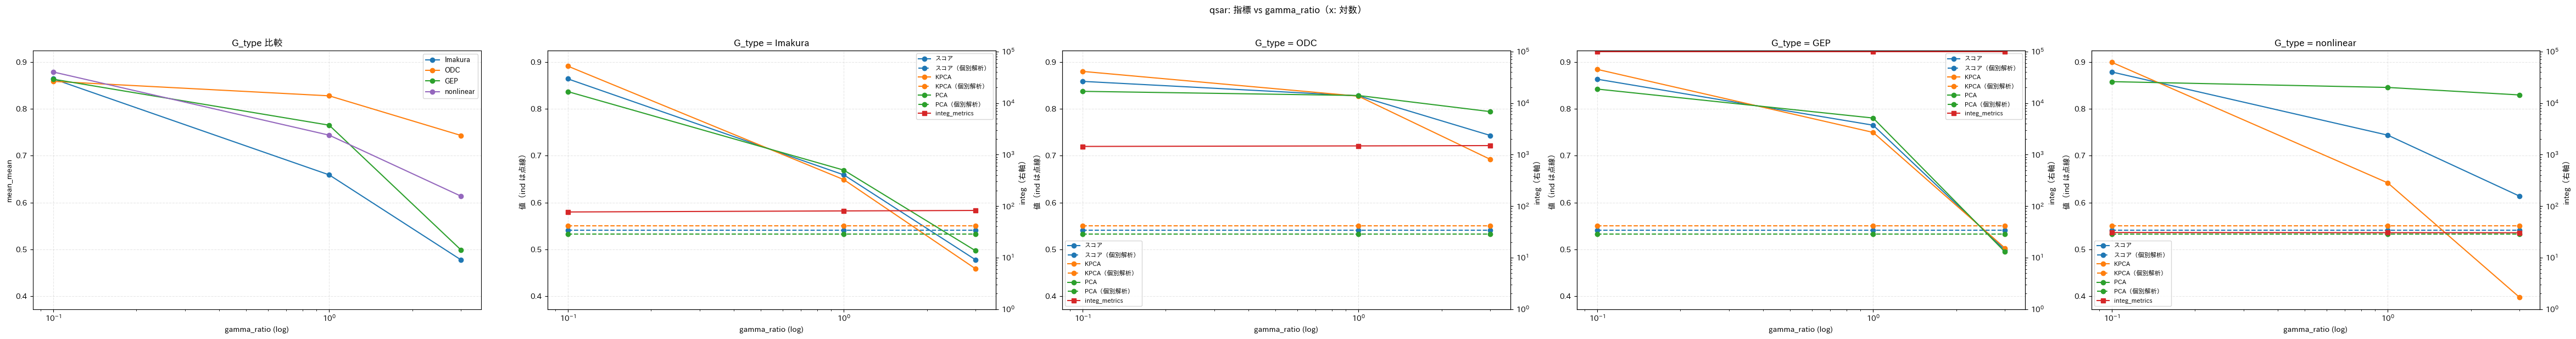

saved: C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\plots\result_qsar_0912__qsar_hstack.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 入力CSV（集計済み: result_0912.csv）
csv_path = Path(r"C:\Users\sueya\Git-Repositories\takano_labo\dca_yanagi\output\exp005\result_grid_wine_quality.csv")

# 対象データセット（必要に応じて追加）
datasets = ["qsar"]  # 例: ["concentric_three_circles", "mnist", "fashion_mnist"]

# 対象 G_type（この順で並べる）
target_gtypes = ["Imakura", "ODC", "GEP", "nonlinear"]

# 色・スタイル定義
palette = {
    "mean": "tab:blue",
    "even": "tab:orange",
    "odd": "tab:green",
    "metrics": "tab:purple",
    "integ": "tab:red",
}

# 表示したい系列の論理名 -> 実カラム候補（先に見つかった方を使用）
series_candidates = {
    # 左軸（実数値系）
    "mean_mean":        ["losses_mean", "mean_mean"],
    "even_mean":        ["losses_even", "even_mean"],
    "odd_mean":         ["losses_odd", "odd_mean"],
    "ind_mean":         ["losses_ind", "ind_mean"],
    "even_ind_mean":    ["losses_even_ind", "even_ind_mean"],
    "odd_ind_mean":     ["losses_odd_ind", "odd_ind_mean"],
    # 右軸
    "integ_metrics_mean": ["integ_metrics_mean", "integ_metrics"],
}

# ラベル・スタイル（indは点線）
series_style = {
    "mean_mean":        {"label": "スコア",               "color": palette["mean"],    "ls": "-"},
    "ind_mean":         {"label": "スコア（個別解析）",   "color": palette["mean"],    "ls": "--"},
    "even_mean":        {"label": "KPCA",                "color": palette["even"],    "ls": "-"},
    "even_ind_mean":    {"label": "KPCA（個別解析）",     "color": palette["even"],    "ls": "--"},
    "odd_mean":         {"label": "PCA",                 "color": palette["odd"],     "ls": "-"},
    "odd_ind_mean":     {"label": "PCA（個別解析）",      "color": palette["odd"],     "ls": "--"},
    "metrics_mean":     {"label": "metrics",            "color": palette["metrics"], "ls": "-"},
    "integ_metrics_mean": {"label": "integ_metrics",    "color": palette["integ"],   "ls": "-"},
}

def pick_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# 読み込み
df = pd.read_csv(csv_path)

# 型整形
if "gamma_ratio" not in df.columns:
    raise ValueError("gamma_ratio 列が見つかりません。")
df["gamma_ratio"] = pd.to_numeric(df["gamma_ratio"], errors="coerce")

# 比較用（左端パネル）に使う列を選ぶ（優先順）
compare_candidates = ["mean_mean"]
compare_col = pick_column(df, compare_candidates)
if compare_col is None:
    raise ValueError("比較用の列（metrics_mean/metrics/losses_mean）が見つかりません。")

# 出力先
outdir = csv_path.parent / "plots"
outdir.mkdir(parents=True, exist_ok=True)

for dataset in datasets:
    dfd = df[(df["dataset"] == dataset) & df["gamma_ratio"].notna()].copy()
    if dfd.empty:
        print(f"[warn] dataset={dataset} のデータがありません。スキップします。")
        continue

    # 実際に存在する G_type の順序を決定
    gtypes_present = [g for g in target_gtypes if g in dfd["G_type"].unique()]
    if not gtypes_present:
        print(f"[warn] dataset={dataset}: target_gtypes のデータがありません。スキップします。")
        continue

    # 各論理系列 -> 実カラム名を確定（このデータセット内で存在する列のみ）
    resolved_cols = {}
    for key, cands in series_candidates.items():
        col = pick_column(dfd, cands)
        if col is not None:
            resolved_cols[key] = col
    # 左軸に使う系列のキー
    left_keys = [k for k in ["metrics_mean", "mean_mean", "ind_mean", "even_mean", "even_ind_mean", "odd_mean", "odd_ind_mean"]
                 if k in resolved_cols]
    # 右軸のキー
    right_keys = [k for k in ["integ_metrics_mean"] if k in resolved_cols]

    # y軸レンジ（左軸）をデータセット全体・全G_typeで揃える
    left_min, left_max = np.inf, -np.inf
    for g in gtypes_present:
        sub = dfd[dfd["G_type"] == g]
        for key in left_keys:
            vals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()
            vals = vals[np.isfinite(vals)]
            if vals.size:
                left_min = min(left_min, vals.min())
                left_max = max(left_max, vals.max())
    if not np.isfinite(left_min) or not np.isfinite(left_max):
        left_min, left_max = 0.0, 1.0
    if np.isclose(left_min, left_max):
        pad = 0.05 if left_max == 0 else 0.05 * abs(left_max)
        left_min, left_max = left_min - pad, left_max + pad
    else:
        span = left_max - left_min
        left_min -= 0.05 * span
        left_max += 0.05 * span

    # y軸レンジ（右軸：integ）をデータセット全体・全G_typeで揃える
    right_min, right_max = np.inf, -np.inf
    if right_keys:
        for g in gtypes_present:
            sub = dfd[dfd["G_type"] == g]
            for key in right_keys:
                vals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()
                vals = vals[np.isfinite(vals)]
                if vals.size:
                    right_min = min(right_min, vals.min())
                    right_max = max(right_max, vals.max())
        if not np.isfinite(right_min) or not np.isfinite(right_max):
            right_min, right_max = 0.0, 1.0
        if np.isclose(right_min, right_max):
            pad = 0.05 if right_max == 0 else 0.05 * abs(right_max)
            right_min, right_max = right_min - pad, right_max + pad
        else:
            span = right_max - right_min
            right_min -= 0.05 * span
            right_max += 0.05 * span

    # 横並びサブプロット（左端が比較、以降が各G_type）
    ncols = 1 + len(gtypes_present)
    fig, axes = plt.subplots(
        1, ncols, figsize=(9.0 * ncols + 2, 6),
        sharex=False
    )
    if ncols == 1:
        axes = [axes]
    fig.suptitle(f"{dataset}: 指標 vs gamma_ratio（x: 対数）", y=1.02, fontsize=12)

    # 0列目：G_type 間の比較（compare_col）
    axc = axes[0]
    for g, col in zip(gtypes_present, ["tab:blue", "tab:orange", "tab:green", "tab:purple"][:len(gtypes_present)]):
        sub = dfd[dfd["G_type"] == g].copy()
        sub = sub.sort_values("gamma_ratio")
        x = sub["gamma_ratio"].to_numpy()
        m = np.isfinite(x) & (x > 0)
        x = x[m]
        y = pd.to_numeric(sub[compare_col], errors="coerce").to_numpy()[m]
        axc.plot(x, y, marker="o", linestyle="-", color=col, label=g)
    axc.set_xscale("log")
    axc.set_xlabel("gamma_ratio (log)")
    axc.set_ylabel(compare_col)
    # 左軸と揃える（比較の見やすさ優先で左軸範囲を共通化）
    axc.set_ylim(left_min, left_max)
    axc.grid(True, ls="--", alpha=0.3)
    axc.set_title("G_type 比較")
    axc.legend(fontsize=9, loc="best")

    # 各 G_type パネル
    for idx, g in enumerate(gtypes_present, start=1):
        ax = axes[idx]
        sub = dfd[dfd["G_type"] == g].copy()
        sub = sub.sort_values("gamma_ratio")
        x_all = sub["gamma_ratio"].to_numpy()
        mpos = np.isfinite(x_all) & (x_all > 0)
        x = x_all[mpos]

        # 左軸
        lines, labels = [], []
        for key in left_keys:
            style = series_style[key]
            yvals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()[mpos]
            if np.isfinite(yvals).any():
                ln, = ax.plot(x, yvals, marker="o", linestyle=style["ls"], color=style["color"], label=style["label"])
                lines.append(ln); labels.append(style["label"])

        ax.set_xscale("log")
        ax.set_xlabel("gamma_ratio (log)")
        ax.set_ylabel("値（ind は点線）")
        ax.set_ylim(left_min, left_max)
        ax.grid(True, ls="--", alpha=0.3)
        ax.set_title(f"G_type = {g}")

        # 右軸（integ）
        if right_keys:
            axr = ax.twinx()
            for key in right_keys:
                style = series_style[key]
                yvals = pd.to_numeric(sub[resolved_cols[key]], errors="coerce").to_numpy()[mpos]
                if np.isfinite(yvals).any():
                    ln, = axr.plot(x, yvals, marker="s", linestyle=style["ls"], color=style["color"], label=style["label"])
                    lines.append(ln); labels.append(style["label"])
            if right_min <= 0:
                right_min = 1
            axr.set_ylabel("integ（右軸）")
            axr.set_ylim(right_min, right_max)
            axr.set_yscale("log") 

        # 凡例（このパネルだけで完結）
        if lines:
            ax.legend(lines, labels, fontsize=8, loc="best")

    plt.tight_layout()
    save_path = outdir / f"{csv_path.stem}_{dataset}_hstack.png"
    plt.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.show()
    print(f"saved: {save_path}")

In [2]:
(0.7142+0.6965)/2

0.7053499999999999